In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import numpy as np


### Load datasets

In [2]:
properties = pd.read_csv('data/diamonds_properties.csv')
transactional = pd.read_csv('data/diamonds_transactional.csv')
dimensions = pd.read_csv('data/diamonds_dimensions.csv')
city = pd.read_csv('data/diamonds_city.csv')
clarity = pd.read_csv('data/diamonds_clarity.csv')
color = pd.read_csv('data/diamonds_color.csv')
cut = pd.read_csv('data/diamonds_cut.csv')


In [ ]:
properties.head(1)

In [ ]:
transactional.head(1)

In [ ]:
dimensions.head(1)

In [ ]:
city.head(1)

In [ ]:
clarity.head(1)

In [ ]:
color.head(1)

In [ ]:
cut.head(1)

In [ ]:
properties.info()

### Merge datasets

In [3]:
# merge datasets 
print(len(properties))
diamonds = properties.merge(transactional) \
                     .merge(city).drop('city_id',
                                       axis=1) \
                     .merge(cut).drop('cut_id',
                                      axis=1) \
                     .merge(color).drop('color_id',
                                        axis=1) \
                     .merge(clarity).drop('clarity_id',
                                          axis=1) \
                     .merge(dimensions)
print(len(diamonds))
diamonds

40455
40455


,index_id,price,carat,city,cut,color,clarity,depth,table,x,y,z
0,5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...,4268,1.21,Kimberly,Premium,J,VS2,62.4,58.0,6.83,6.79,4.25
1,248aa2bdd0032920ac9e5f6ad36c350549da067efeaf7b...,4839,1.20,Kimberly,Premium,J,VS2,60.8,60.0,6.85,6.89,4.18
2,72b31cf00f8ab3967588fad4a32f61622cb162f9b7bc2c...,368,0.30,Kimberly,Premium,J,VS2,60.6,59.0,4.34,4.38,2.64
3,98c53df687f2e9b94da80eef5b9049f1fac456b4c41c80...,5053,1.20,Kimberly,Premium,J,VS2,62.6,57.0,6.80,6.72,4.23
4,5dfe43a321c6834c7de273c73aeadc705d919a5869e0f5...,3593,1.05,Kimberly,Premium,J,VS2,59.4,62.0,6.66,6.58,3.93
...,...,...,...,...,...,...,...,...,...,...,...,...
40450,097db724e4c3e305e3cab516a90727b5ba198654479af6...,2632,0.59,Paris,Very Good,F,IF,59.9,63.0,5.44,5.47,3.27
40451,7a2f5310cf8293f60a9103040d9a0ac0a9ce1d625f5121...,9972,1.01,Paris,Very Good,F,IF,63.5,59.0,6.29,6.41,4.03
40452,7d6fb002a947a9c894eb5c2a5a12be30cb7d4af83a29d9...,886,0.30,Paris,Very Good,F,IF,62.4,56.0,4.28,4.31,2.68
40453,7880bd7fe5dcd28637eade8b95c42961c6c5acffa946a6...,3205,0.71,Antwerp,Fair,F,IF,58.7,62.0,5.87,5.81,3.43


In [4]:
diamonds = diamonds.assign(volume = lambda x: x['x'] * x['y'] * x['z'])
diamonds

,index_id,price,carat,city,cut,color,clarity,depth,table,x,y,z,volume
0,5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...,4268,1.21,Kimberly,Premium,J,VS2,62.4,58.0,6.83,6.79,4.25,197.096725
1,248aa2bdd0032920ac9e5f6ad36c350549da067efeaf7b...,4839,1.20,Kimberly,Premium,J,VS2,60.8,60.0,6.85,6.89,4.18,197.281370
2,72b31cf00f8ab3967588fad4a32f61622cb162f9b7bc2c...,368,0.30,Kimberly,Premium,J,VS2,60.6,59.0,4.34,4.38,2.64,50.184288
3,98c53df687f2e9b94da80eef5b9049f1fac456b4c41c80...,5053,1.20,Kimberly,Premium,J,VS2,62.6,57.0,6.80,6.72,4.23,193.294080
4,5dfe43a321c6834c7de273c73aeadc705d919a5869e0f5...,3593,1.05,Kimberly,Premium,J,VS2,59.4,62.0,6.66,6.58,3.93,172.223604
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40450,097db724e4c3e305e3cab516a90727b5ba198654479af6...,2632,0.59,Paris,Very Good,F,IF,59.9,63.0,5.44,5.47,3.27,97.304736
40451,7a2f5310cf8293f60a9103040d9a0ac0a9ce1d625f5121...,9972,1.01,Paris,Very Good,F,IF,63.5,59.0,6.29,6.41,4.03,162.485167
40452,7d6fb002a947a9c894eb5c2a5a12be30cb7d4af83a29d9...,886,0.30,Paris,Very Good,F,IF,62.4,56.0,4.28,4.31,2.68,49.437424
40453,7880bd7fe5dcd28637eade8b95c42961c6c5acffa946a6...,3205,0.71,Antwerp,Fair,F,IF,58.7,62.0,5.87,5.81,3.43,116.979121


In [5]:
diamonds['cut_n'] = pd.factorize(diamonds['cut'])[0]
diamonds['color_n'] = pd.factorize(diamonds['color'])[0]
diamonds['clarity_n'] = pd.factorize(diamonds['clarity'])[0]
diamonds

,index_id,price,carat,city,cut,color,clarity,depth,table,x,y,z,volume,cut_n,color_n,clarity_n
0,5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...,4268,1.21,Kimberly,Premium,J,VS2,62.4,58.0,6.83,6.79,4.25,197.096725,0,0,0
1,248aa2bdd0032920ac9e5f6ad36c350549da067efeaf7b...,4839,1.20,Kimberly,Premium,J,VS2,60.8,60.0,6.85,6.89,4.18,197.281370,0,0,0
2,72b31cf00f8ab3967588fad4a32f61622cb162f9b7bc2c...,368,0.30,Kimberly,Premium,J,VS2,60.6,59.0,4.34,4.38,2.64,50.184288,0,0,0
3,98c53df687f2e9b94da80eef5b9049f1fac456b4c41c80...,5053,1.20,Kimberly,Premium,J,VS2,62.6,57.0,6.80,6.72,4.23,193.294080,0,0,0
4,5dfe43a321c6834c7de273c73aeadc705d919a5869e0f5...,3593,1.05,Kimberly,Premium,J,VS2,59.4,62.0,6.66,6.58,3.93,172.223604,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40450,097db724e4c3e305e3cab516a90727b5ba198654479af6...,2632,0.59,Paris,Very Good,F,IF,59.9,63.0,5.44,5.47,3.27,97.304736,3,6,7
40451,7a2f5310cf8293f60a9103040d9a0ac0a9ce1d625f5121...,9972,1.01,Paris,Very Good,F,IF,63.5,59.0,6.29,6.41,4.03,162.485167,3,6,7
40452,7d6fb002a947a9c894eb5c2a5a12be30cb7d4af83a29d9...,886,0.30,Paris,Very Good,F,IF,62.4,56.0,4.28,4.31,2.68,49.437424,3,6,7
40453,7880bd7fe5dcd28637eade8b95c42961c6c5acffa946a6...,3205,0.71,Antwerp,Fair,F,IF,58.7,62.0,5.87,5.81,3.43,116.979121,4,6,7


### Explore

In [6]:
diamonds.describe()

,price,carat,depth,table,x,y,z,volume,cut_n,color_n,clarity_n
count,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000
mean,3928.444469,0.797706,61.752841,57.446133,5.729392,5.732819,3.537154,129.802259,1.687208,3.482487,2.514325
std,3992.416147,0.475544,1.431725,2.233535,1.124453,1.146650,0.697062,78.903997,1.162905,1.824040,2.118571
min,326.000000,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,945.000000,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000,64.889552,0.000000,2.000000,1.000000
50%,2397.000000,0.700000,61.800000,57.000000,5.690000,5.710000,3.520000,114.689347,2.000000,4.000000,3.000000
75%,5331.000000,1.040000,62.500000,59.000000,6.540000,6.540000,4.035000,170.844547,3.000000,5.000000,4.000000
max,18823.000000,4.500000,79.000000,95.000000,10.230000,58.900000,8.060000,3840.598060,4.000000,6.000000,7.000000


In [7]:
d_carat_max_min = pd.concat([diamonds.loc[diamonds['carat'] == diamonds['carat'].max()],
                             diamonds.loc[diamonds['carat'] == diamonds['carat'].min()]])
d_carat_max_min

,index_id,price,carat,city,cut,color,clarity,depth,table,x,y,z,volume,cut_n,color_n,clarity_n
19034,0f1f13ef2ed5183e68c29c8c99f19851b2fc0f226c385d...,18531,4.5,Surat,Fair,J,I1,65.8,58.0,10.23,10.16,6.72,698.455296,4,0,2
3230,d937ffa207c3d50aeaeb3cd05f1c5e4fef70246a1b3d21...,367,0.2,Kimberly,Premium,D,VS2,61.7,60.0,3.77,3.72,2.31,32.396364,0,3,0
3858,927fcdcd5c55b3c3cd828fa8e5d5ce7af4e9096d4b9a0b...,367,0.2,Dubai,Ideal,D,VS2,61.5,57.0,3.81,3.77,2.33,33.467421,2,3,0
5767,95d3a6437b56fbcc23f34db6b519c4956c53e2955c76a9...,367,0.2,Kimberly,Premium,E,VS2,59.8,62.0,3.79,3.77,2.26,32.291558,0,5,0
6058,e1299b1fe6306876f5135f76e0403dd88c18ef5d0e1352...,367,0.2,Tel Aviv,Premium,E,VS2,59.7,62.0,3.84,3.80,2.28,33.269760,0,5,0
6380,b3f3b8b46322948a265ea4552f877febd67b0b2a614685...,367,0.2,Kimberly,Ideal,E,VS2,59.7,55.0,3.86,3.84,2.30,34.091520,2,5,0
30339,6d78b19a042a64f08cc4df0d42fb91cd757829718e60e8...,345,0.2,Surat,Premium,E,SI2,60.2,62.0,3.79,3.75,2.27,32.262375,0,5,4


In [8]:
d_price_max_min = pd.concat([diamonds.loc[diamonds['price'] == diamonds['price'].max()],
                             diamonds.loc[diamonds['price'] == diamonds['price'].min()]])
d_price_max_min

,index_id,price,carat,city,cut,color,clarity,depth,table,x,y,z,volume,cut_n,color_n,clarity_n
732,0929b60950cb33cc0a978ad4663611a54497bb4fe44b25...,18823,2.29,Tel Aviv,Premium,I,VS2,60.8,60.0,8.50,8.47,5.16,371.494200,0,1,0
16007,a21cefec25404279928e2ffe9d49630f691600cd9d9a1e...,326,0.21,Surat,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,34.505856,0,5,1
30562,257e3cd0744845b83c0d1f8a114d5c04218844a0c8debe...,326,0.23,Kimberly,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,38.202030,2,5,4


In [9]:
d_volum_max_min = pd.concat([diamonds.loc[diamonds['volume'] == diamonds['volume'].max()],
                             diamonds.loc[diamonds['volume'] == diamonds['volume'].min()]])
d_volum_max_min

,index_id,price,carat,city,cut,color,clarity,depth,table,x,y,z,volume,cut_n,color_n,clarity_n
28922,daeb96ce8d169c2a9b958853c724d46352d4749b0ebffa...,12210,2.00,Antwerp,Premium,H,SI2,58.9,57.0,8.09,58.90,8.06,3840.59806,0,4,4
2508,fa0cb0b93e1bdf27a23aaf0d8f7a775ec055dd432cc8c6...,5564,1.15,Madrid,Ideal,G,VS2,59.2,56.0,6.88,6.83,0.00,0.00000,2,2,0
4516,5366ec7df49331f43da1f43fedc75ce2b333ccc2b39fd9...,18207,2.02,Kimberly,Premium,H,VS2,62.7,53.0,8.02,7.95,0.00,0.00000,0,4,0
9891,e832a0253523f9e2e4a0a7bb28f4bf44eb0ca8c38eab12...,15397,2.25,Antwerp,Premium,I,SI1,61.3,58.0,8.52,8.42,0.00,0.00000,0,1,1
14325,3366cbd949ed025b9bb9a706f82eb6d53993c012e64360...,17265,2.20,Surat,Premium,H,SI1,61.2,59.0,8.42,8.37,0.00,0.00000,0,4,1
19150,236a75b2ceb98dd392c779cb72c89460f5788d35f9e843...,4731,1.50,Kimberly,Good,G,I1,64.0,61.0,7.15,7.04,0.00,0.00000,1,2,2
19258,a646d24d01054270efaec7eda44fb8721271d196c55d81...,3167,1.01,Kimberly,Premium,H,I1,58.1,59.0,6.66,6.60,0.00,0.00000,0,4,2
22226,41e2e3dcdbd3996fc30e82e520b032432e1ad19ff94905...,6381,1.14,Amsterdam,Fair,G,VS1,57.5,67.0,0.00,0.00,0.00,0.00000,4,2,3
26850,b7d286a95afa0f5410efa442abe03f1b0182b270035007...,3696,1.10,Dubai,Premium,G,SI2,63.0,59.0,6.50,6.47,0.00,0.00000,0,2,4
26934,c9f96f95732be31d3446ba4400a7fe200f252d639074f0...,3142,1.00,Zurich,Premium,G,SI2,59.1,59.0,6.55,6.48,0.00,0.00000,0,2,4


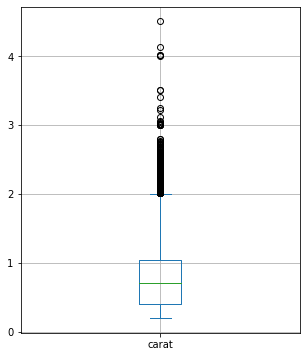

In [10]:
# summary statistics carat
ax = diamonds['carat'].plot.box(figsize=(5, 6))
plt.grid()
plt.show()

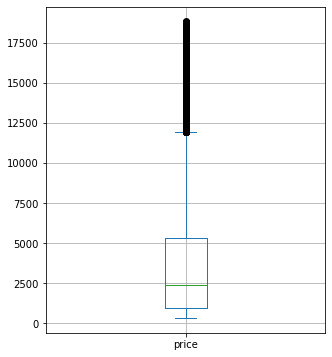

In [11]:
# summary statistics price
ax = diamonds['price'].plot.box(figsize=(5, 6))
plt.grid()
plt.show()

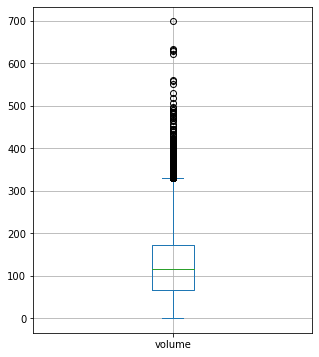

In [37]:
# summary statistics carat
ax = diamonds[diamonds['volume'] != diamonds['volume'].max()]['volume'].plot.box(figsize=(5, 6))
plt.grid()
plt.show()

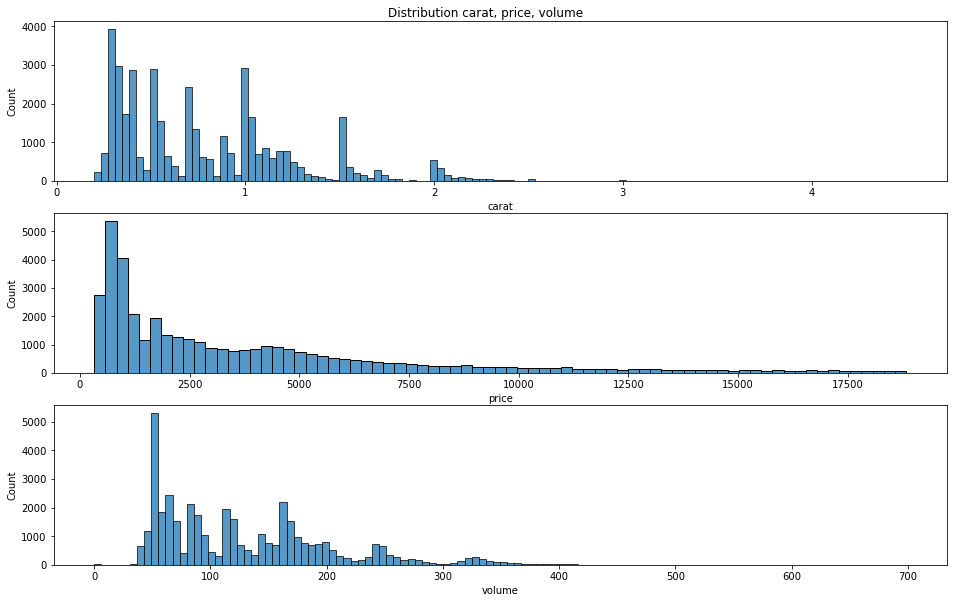

In [36]:
fig, axs = plt.subplots(ncols=1,
                        nrows=3,
                        figsize=(16, 10))

fig.suptitle('Distribution carat, price, volume', y=0.9) 

plt.sca(axs[0])
sns.histplot(data=diamonds, 
             x='carat')

plt.sca(axs[1])
sns.histplot(data=diamonds, 
             x='price')

plt.sca(axs[2])
sns.histplot(data=diamonds[diamonds['volume'] != diamonds['volume'].max()],
             x='volume')

plt.show()

In [14]:
diamonds.corr()

,price,carat,depth,table,x,y,z,volume,cut_n,color_n,clarity_n
price,1.000000,0.921935,-0.014864,0.130111,0.885848,0.866163,0.874500,0.898684,-0.065887,-0.113887,-0.045288
carat,0.921935,1.000000,0.026528,0.183392,0.975688,0.951667,0.967570,0.971851,-0.066582,-0.192947,-0.096956
depth,-0.014864,0.026528,1.000000,-0.293114,-0.026348,-0.030966,0.094655,0.006721,0.206985,-0.039990,-0.039305
table,0.130111,0.183392,-0.293114,1.000000,0.196059,0.184673,0.155189,0.168437,-0.213514,-0.008125,-0.065386
x,0.885848,0.975688,-0.026348,0.196059,1.000000,0.973712,0.984876,0.952303,-0.078204,-0.174277,-0.117496
y,0.866163,0.951667,-0.030966,0.184673,0.973712,1.000000,0.964828,0.977860,-0.064192,-0.169319,-0.111048
z,0.874500,0.967570,0.094655,0.155189,0.984876,0.964828,1.000000,0.953983,-0.042520,-0.177327,-0.119223
volume,0.898684,0.971851,0.006721,0.168437,0.952303,0.977860,0.953983,1.000000,-0.067535,-0.186923,-0.091888
cut_n,-0.065887,-0.066582,0.206985,-0.213514,-0.078204,-0.064192,-0.042520,-0.067535,1.000000,0.019816,0.054003
color_n,-0.113887,-0.192947,-0.039990,-0.008125,-0.174277,-0.169319,-0.177327,-0.186923,0.019816,1.000000,0.007368


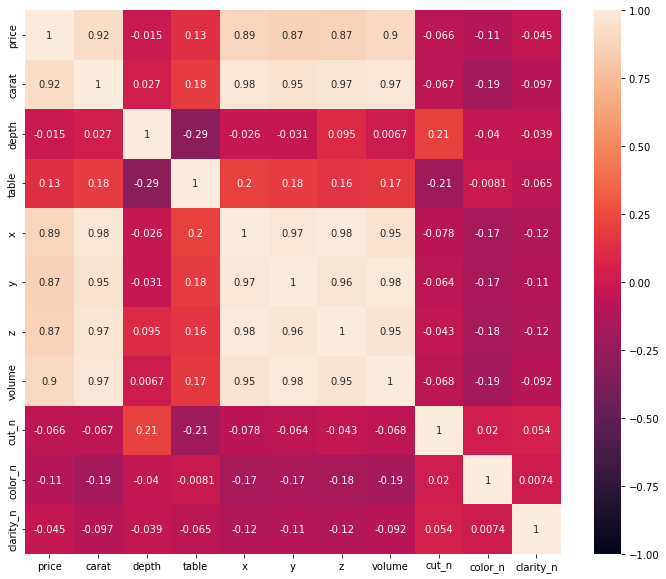

In [15]:
# correlation
fig, ax = plt.subplots(figsize=(12, 10))
ax = sns.heatmap(diamonds.corr(), 
                 vmin=-1,
                 vmax=1,
                 annot=True)


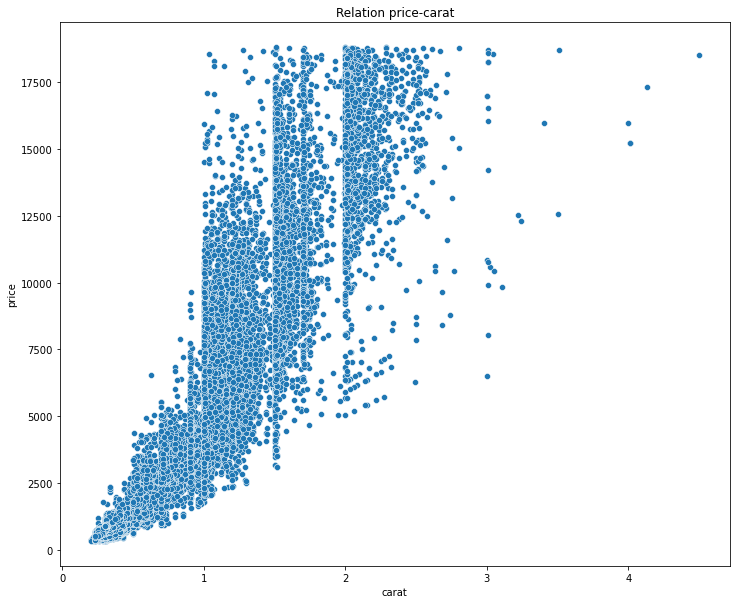

In [16]:
# price, carat
fig, ax = plt.subplots(figsize=(12, 10))
ax = sns.scatterplot(data=diamonds, 
                     x='carat', 
                     y='price').set(title='Relation price-carat')


In [17]:
# cut
print(diamonds['cut'].unique())
order_cut = ['Fair', 'Ideal', 'Good', 'Very Good', 'Premium']
order_cut

['Premium' 'Good' 'Ideal' 'Very Good' 'Fair']


['Fair', 'Ideal', 'Good', 'Very Good', 'Premium']

In [18]:
# color
print(diamonds['color'].unique())
order_color = list(diamonds['color'].unique())
order_color.sort()
order_color

['J' 'I' 'G' 'D' 'H' 'E' 'F']


['D', 'E', 'F', 'G', 'H', 'I', 'J']

In [19]:
# clarity
print(diamonds['clarity'].unique())
order_clarity = ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1']
order_clarity

['VS2' 'SI1' 'I1' 'VS1' 'SI2' 'VVS2' 'VVS1' 'IF']


['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1']

In [20]:
# city
print(diamonds['city'].unique())
order_city = list(diamonds['city'].unique())
order_city.sort()
print(order_city)

['Kimberly' 'Antwerp' 'London' 'New York City' 'Dubai' 'Las Vegas'
 'Madrid' 'Zurich' 'Tel Aviv' 'Amsterdam' 'Luxembourg' 'Surat' 'Paris']
['Amsterdam', 'Antwerp', 'Dubai', 'Kimberly', 'Las Vegas', 'London', 'Luxembourg', 'Madrid', 'New York City', 'Paris', 'Surat', 'Tel Aviv', 'Zurich']


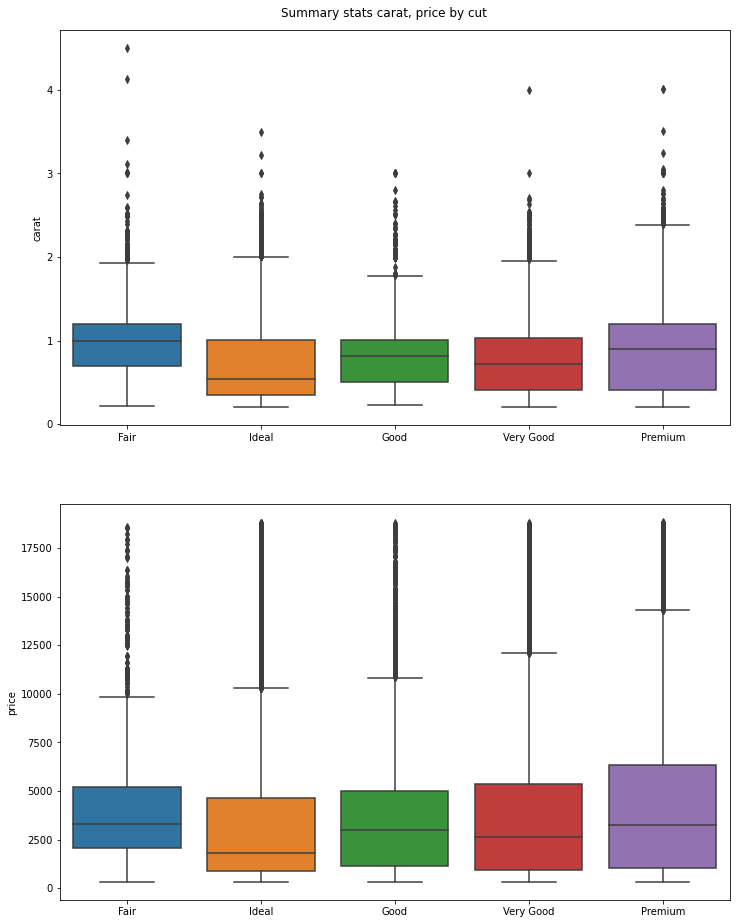

In [21]:
# summary stats carat, price by cut
fig, axs = plt.subplots(ncols=1,
                        nrows=2,
                        figsize=(12, 16))

fig.suptitle('Summary stats carat, price by cut', y=0.9) 

plt.sca(axs[0])
sns.boxplot(data=diamonds, 
            x='cut', 
            y='carat',
            order=order_cut).set(xlabel='')

plt.sca(axs[1])
sns.boxplot(data=diamonds, 
            x='cut', 
            y='price',
            order=order_cut).set(xlabel='')

plt.show()

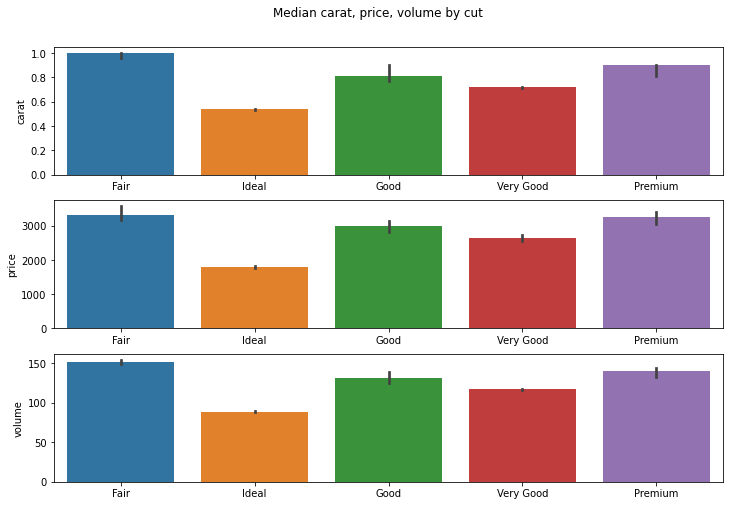

In [22]:
fig, axs = plt.subplots(ncols=1,
                        nrows=3,
                        figsize=(12, 8))

fig.suptitle('Median carat, price, volume by cut', y=0.95) 

plt.sca(axs[0])
sns.barplot(data=diamonds, 
            x='cut', 
            y='carat',
            order=order_cut,
            estimator=np.median).set(xlabel='')

plt.sca(axs[1])
sns.barplot(data=diamonds, 
            x='cut', 
            y='price',
            order=order_cut,
            estimator=np.median).set(xlabel='')

plt.sca(axs[2])
sns.barplot(data=diamonds, 
            x='cut', 
            y='volume',
            order=order_cut,
            estimator=np.median).set(xlabel='')

plt.show()


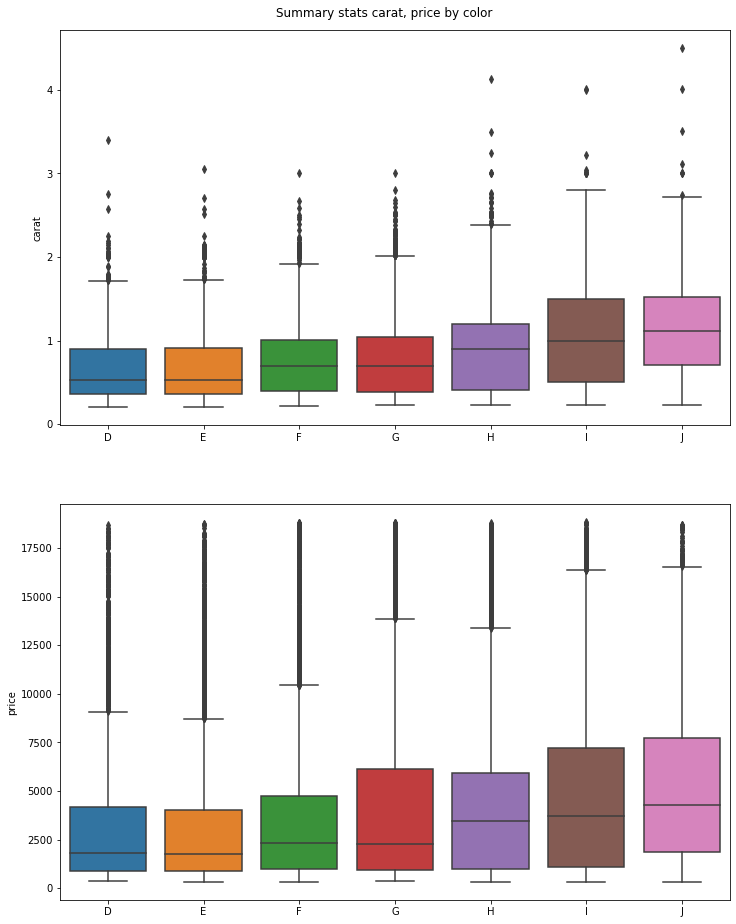

In [23]:
# summary stats carat, price by color
fig, axs = plt.subplots(ncols=1,
                        nrows=2,
                        figsize=(12, 16))

fig.suptitle('Summary stats carat, price by color', y=0.9) 

plt.sca(axs[0])
sns.boxplot(data=diamonds, 
            x='color', 
            y='carat',
            order=order_color).set(xlabel='')

plt.sca(axs[1])
sns.boxplot(data=diamonds, 
            x='color', 
            y='price',
            order=order_color).set(xlabel='')

plt.show()


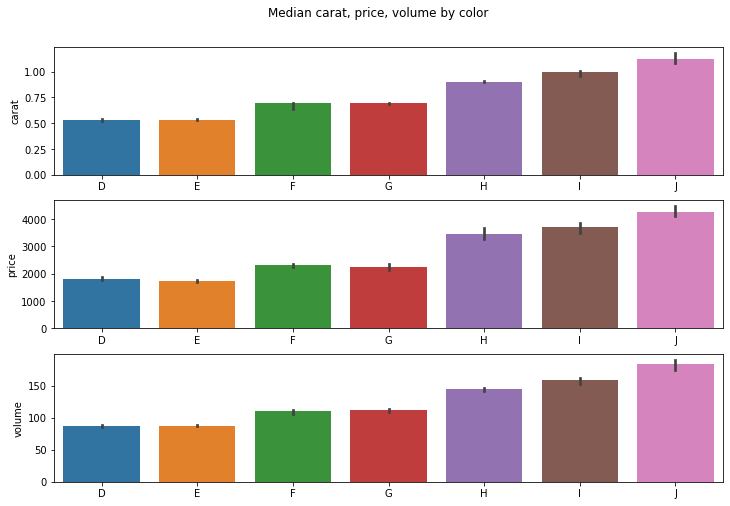

In [32]:
fig, axs = plt.subplots(ncols=1,
                        nrows=3,
                        figsize=(12, 8))

fig.suptitle('Median carat, price, volume by color', y=0.95) 

plt.sca(axs[0])
sns.barplot(data=diamonds, 
            x='color', 
            y='carat',
            order=order_color,
            estimator=np.median).set(xlabel='')

plt.sca(axs[1])
sns.barplot(data=diamonds, 
            x='color', 
            y='price',
            order=order_color,
            estimator=np.median).set(xlabel='')

plt.sca(axs[2])
sns.barplot(data=diamonds, 
            x='color', 
            y='volume',
            order=order_color,
            estimator=np.median).set(xlabel='')

plt.show()

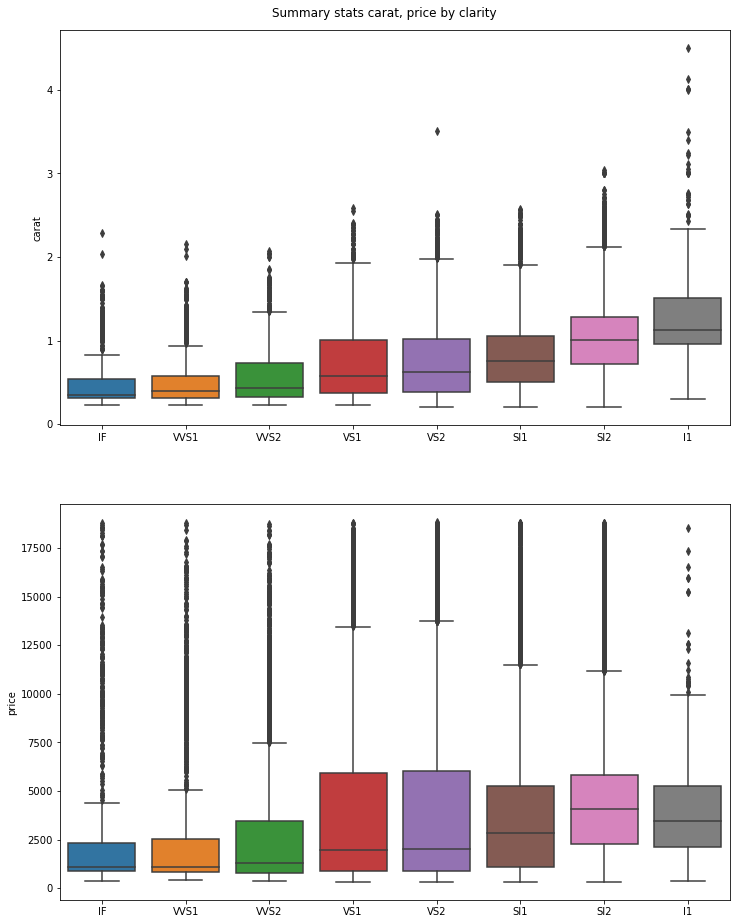

In [26]:
# summary stats carat, price by clarity
fig, axs = plt.subplots(ncols=1,
                        nrows=2,
                        figsize=(12, 16))

fig.suptitle('Summary stats carat, price by clarity', y=0.9) 

plt.sca(axs[0])
sns.boxplot(data=diamonds, 
            x='clarity', 
            y='carat',
            order=order_clarity).set(xlabel='')

plt.sca(axs[1])
sns.boxplot(data=diamonds, 
            x='clarity', 
            y='price',
            order=order_clarity).set(xlabel='')

plt.show()

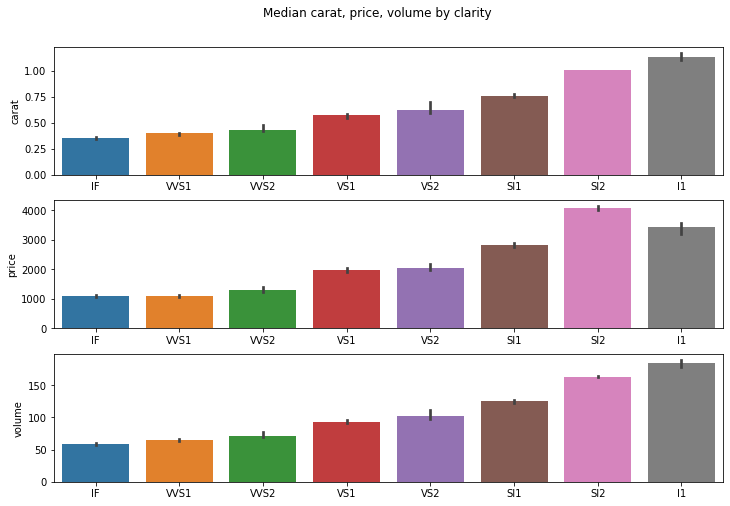

In [27]:
fig, axs = plt.subplots(ncols=1,
                        nrows=3,
                        figsize=(12, 8))

fig.suptitle('Median carat, price, volume by clarity', y=0.95) 

plt.sca(axs[0])
sns.barplot(data=diamonds, 
            x='clarity', 
            y='carat',
            order=order_clarity,
            estimator=np.median).set(xlabel='')

plt.sca(axs[1])
sns.barplot(data=diamonds, 
            x='clarity', 
            y='price',
            order=order_clarity,
            estimator=np.median).set(xlabel='')

plt.sca(axs[2])
sns.barplot(data=diamonds, 
            x='clarity', 
            y='volume',
            order=order_clarity,
            estimator=np.median).set(xlabel='')

plt.show()


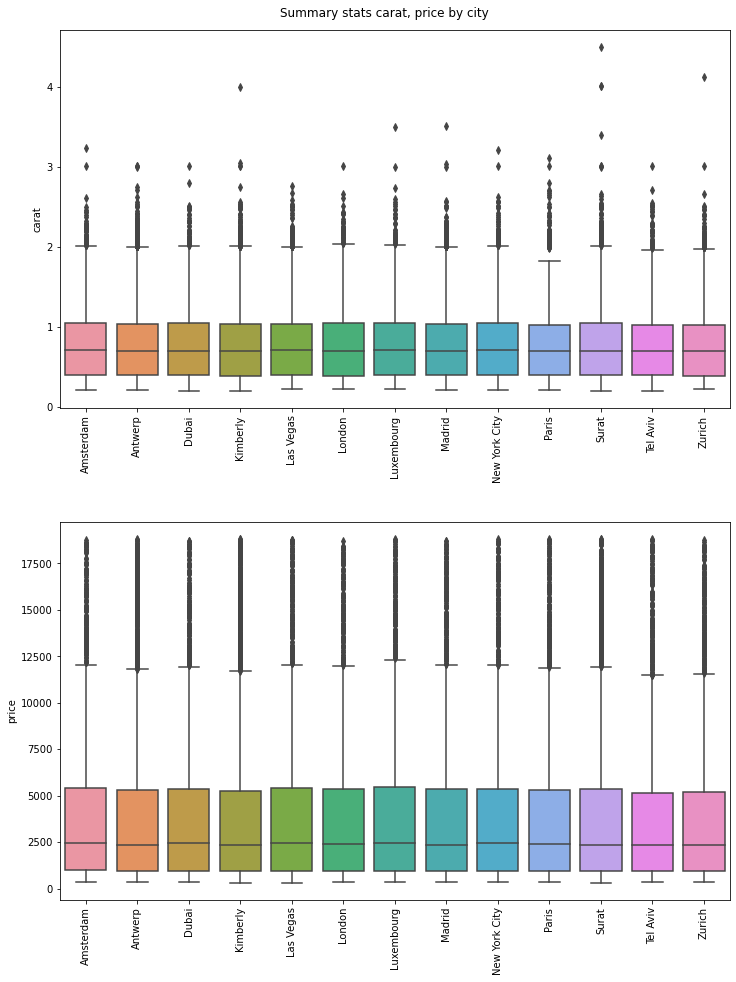

In [38]:
# summary stats carat, price by city
fig, axs = plt.subplots(ncols=1,
                        nrows=2,
                        figsize=(12, 16))

fig.suptitle('Summary stats carat, price by city', y=0.9) 

plt.subplots_adjust(hspace=0.3)

plt.sca(axs[0])
sns.boxplot(data=diamonds, 
            x='city', 
            y='carat',
            order=order_city).set(xlabel='')

plt.xticks(rotation='vertical')

plt.sca(axs[1])
sns.boxplot(data=diamonds, 
            x='city', 
            y='price',
            order=order_city).set(xlabel='')

plt.xticks(rotation='vertical')

plt.show()

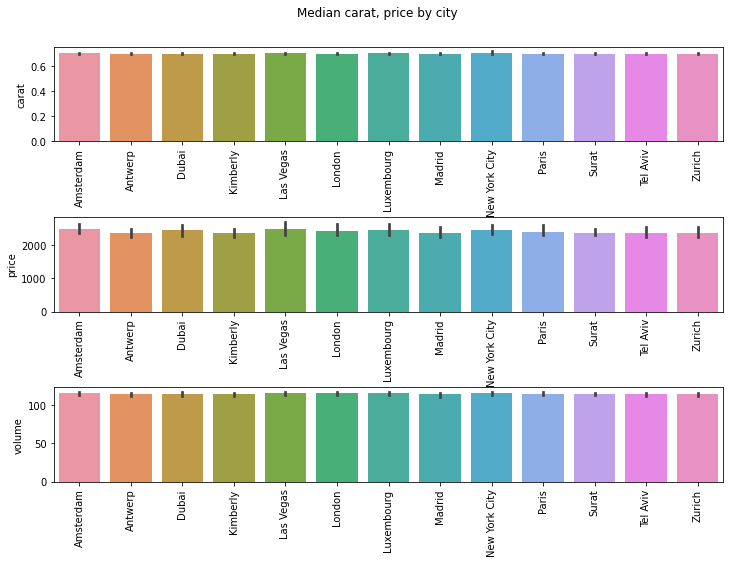

In [39]:
fig, axs = plt.subplots(ncols=1,
                        nrows=3,
                        figsize=(12, 8))

fig.suptitle('Median carat, price by city', y=0.95) 

plt.subplots_adjust(hspace=0.8)

plt.sca(axs[0])
sns.barplot(data=diamonds, 
            x='city', 
            y='carat',
            order=order_city,
            estimator=np.median).set(xlabel='')

plt.xticks(rotation='vertical')

plt.sca(axs[1])
sns.barplot(data=diamonds, 
            x='city', 
            y='price',
            order=order_city,
            estimator=np.median).set(xlabel='')

plt.xticks(rotation='vertical')

plt.sca(axs[2])
sns.barplot(data=diamonds, 
            x='city', 
            y='volume',
            order=order_city,
            estimator=np.median).set(xlabel='')

plt.xticks(rotation='vertical')

plt.show()

### Conclusions

- price and carat: features with the most outliers.
- x, y, z: very close features (direct correlation).
- carat high correlation with dimensions (x, y, z).
- price high correlation with carat.
- cut ('Fair', 'Ideal', 'Good', 'Very Good', 'Premium'):
  - fair: most carat, most price.
  - ideal: least carat, least price.
- color ('D', 'E', 'F', 'G', 'H', 'I', 'J'):
  - J: most carat, most price.
  - D, E: least carat, least price (better E: similar carat, less price).
- clarity ('IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1'):
  - I1: most carat, not most price.
  - SI2: second better carat, most price.
  - IF, VVS1: least carat, least price (better VVS1: better carat, same price).
- city: same carat, similar price. Not significant.
